In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import LogisticRegression

In [13]:
# -----------------------------
# 1. Generate high-dimensional imbalanced dataset
# -----------------------------
X, y = make_classification(n_samples=2000,
                           n_features=2500,
                           n_informative=50,
                           n_redundant=0,
                           n_classes=2,
                           weights=[0.95, 0.05],
                           random_state=42)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

In [15]:
# -----------------------------
# 2. Train plain Naïve Bayes
# -----------------------------
nb = LogisticRegression(max_iter=1000)  #BernoulliNB()
nb.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [16]:
# Raw probabilities
y_proba_raw = nb.predict_proba(X_test)[:, 1]  # class=1 probs

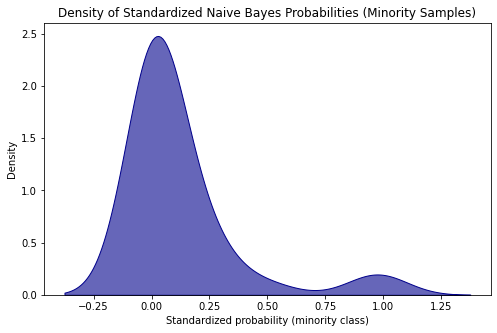

In [19]:
# Select only probabilities of the minority samples (true label = 1)
minority_probs = y_proba_raw[y_test == 1]

# Min-max standardization: scale to [0, 1]
min_val = minority_probs.min()
max_val = minority_probs.max()
minority_probs_std = (minority_probs - min_val) / (max_val - min_val + 1e-20)  # add epsilon to avoid div/0

# -----------------------------
# Plot density of standardized scores
# -----------------------------
plt.figure(figsize=(8, 5))
sns.kdeplot(minority_probs_std, fill=True, color="darkblue", alpha=0.6)
plt.xlabel("Standardized probability (minority class)")
plt.ylabel("Density")
plt.title("Density of Standardized Naive Bayes Probabilities (Minority Samples)")
plt.show()

In [ ]:
y_proba_raw

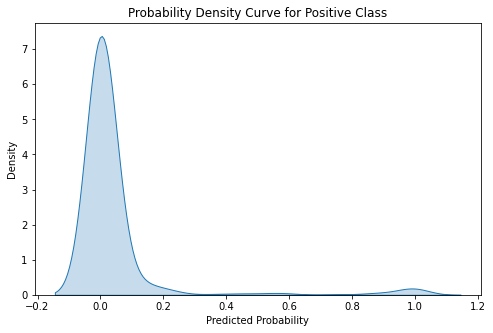

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Example: y_proba as shown above
# y_proba = np.array([...])  # Your data here

# Use the probabilities for the positive class (e.g., column index 1)
probs = y_proba_raw

plt.figure(figsize=(8, 5))
sns.kdeplot(probs, shade=True)
plt.title("Probability Density Curve for Positive Class")
plt.xlabel("Predicted Probability")
plt.ylabel("Density")
plt.show()

In [ ]:
# -----------------------------
# 3. Apply probability calibration
# -----------------------------
cal_nb = CalibratedClassifierCV(base_estimator=BernoulliNB(),
                                method="isotonic", # "",  # or
                                cv=5)
cal_nb.fit(X_train, y_train)

In [ ]:
# Calibrated probabilities
y_proba_cal = cal_nb.predict_proba(X_test)[:, 1]

In [ ]:
# -----------------------------
# 4. Plot probability distributions
# -----------------------------
plt.figure(figsize=(10, 6))
sns.kdeplot(y_proba_raw, label="Raw Naive Bayes", fill=True, alpha=0.5)
sns.kdeplot(y_proba_cal, label="Calibrated Naive Bayes", fill=True, alpha=0.5)
plt.xlabel("Predicted probability for class 1")
plt.ylabel("Density")
plt.title("Probability Distribution Before vs After Calibration")
plt.legend()
plt.show()